# **RAIN IN AUSTRALIA**
*(Predict next-day rain in Australia)*

This dataset comprises about 10 years of daily weather observations from numerous locations across Australia.
The dataset contains daily weather observations from numerous weather stations in Australia, with the goal of predicting whether it will rain tomorrow.

DATASET : https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package

Columns is:
1- Data → The date of observation.

2-Location → The common name of the location of the weather station.

3-MinTemp → The minimum temperature (°C) for the day.

4-MaxTemp → The maximum temperature (°C) for the day.

5-Rainfall → The amount of rain (mm) recorded for the day.

6-Evaporation → The amount of water evaporated (mm) from a Class A pan in 24 hours.

7-Sunshine → The number of hours of bright sunshine in the day.

8-WindGustDir → The direction of the strongest wind gust (e.g., N, S, E, W).

9-WindGustSpeed → The speed (km/h) of the strongest wind gust.

10-WindDir9am → Wind direction at 9 a.m.

11-WindDir3pm → Wind direction at 3 p.m.

12-WindSpeed9am → Wind speed (km/h) at 9 a.m.

13-WindSpeed3pm → Wind speed (km/h) at 3 p.m.

14-Humidity9am → Relative humidity (%) at 9 a.m.

15-Humidity3pm → Relative humidity (%) at 3 p.m.

16-Pressure9am → Atmospheric pressure (hPa) at 9 a.m.

17-Pressure3pm → Atmospheric pressure (hPa) at 3 p.m.

18-Cloud9am → Cloud cover at 9 a.m. (measured in oktas, from 0–8).

19-Cloud3pm → Cloud cover at 3 p.m. (oktas, from 0–8).

20-Temp9am → Temperature (°C) at 9 a.m.

21-Temp3pm → Temperature (°C) at 3 p.m.

22-RainToday → Whether it rained today (Yes or No).

23-RainTomorrow → Target column → Whether it will rain tomorrow (Yes or No).(Target)

In [1]:
import pandas as pd
import numpy as np

#for visualizing:-
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler

# MODELS
# for regression algorithms
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor,RandomForestRegressor,BaggingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

#for classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import model_selection

#from sklearn.utils import class_weight
#from sklearn.model_selection import 

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_classification
from sklearn import svm
from sklearn import tree

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

## UNDERSTANDING THE DATA

In [2]:
df=pd.read_csv("weatherAUS.csv")
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
df.shape

(145460, 23)

In [4]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

## VISUALIZATIONS

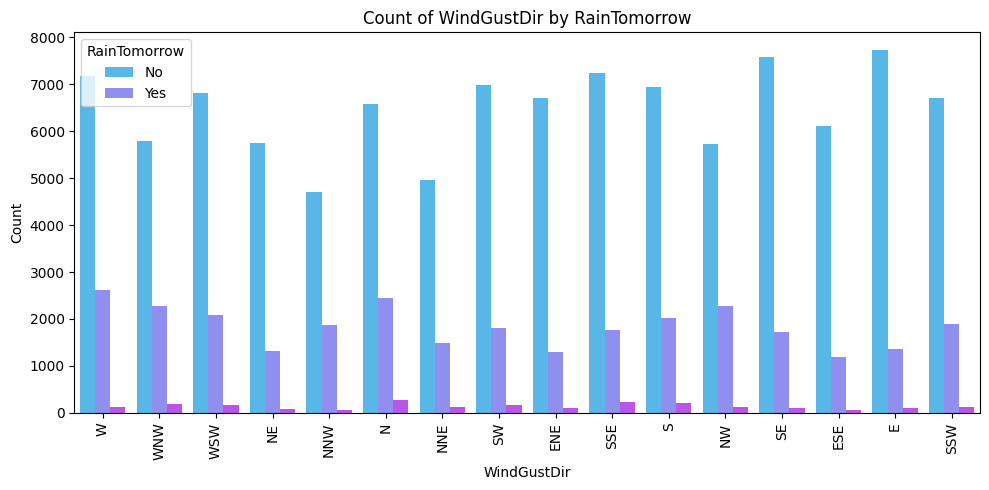

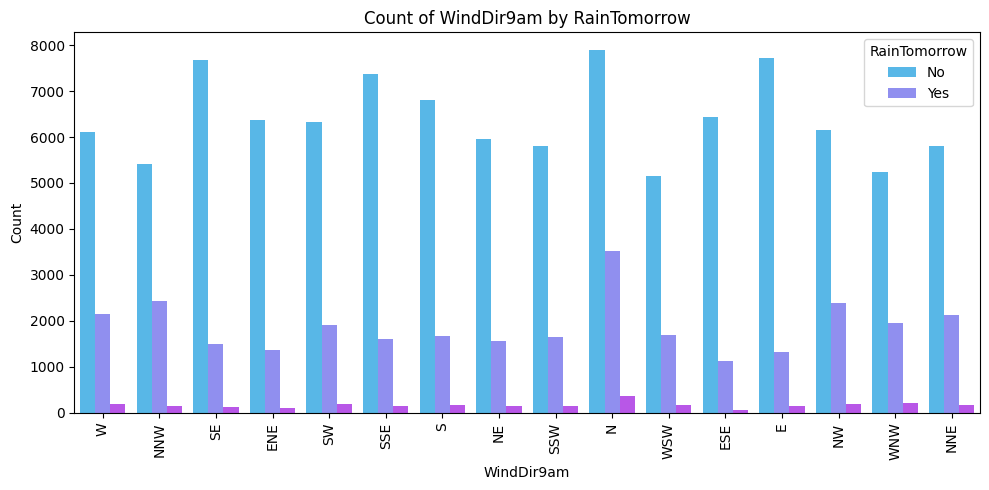

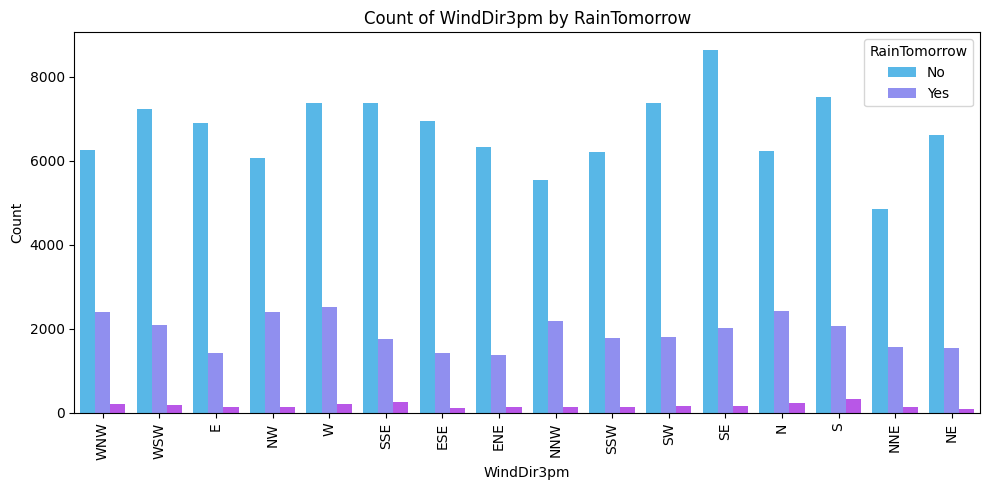

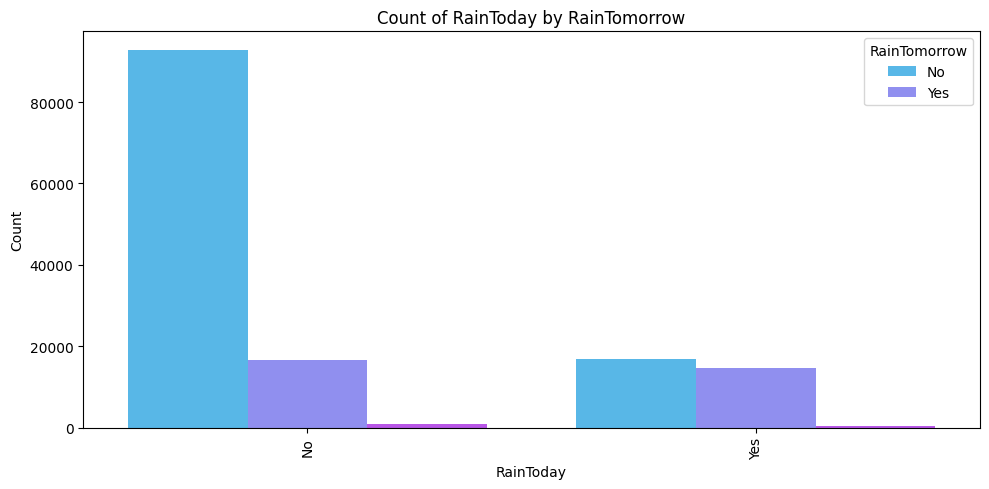

In [6]:
df['RainTomorrow'] = df['RainTomorrow'].astype(str)

# Categorical columns to plot
categorical_cols = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

for col in categorical_cols:
    plt.figure(figsize=(10,5))
    sns.countplot(data=df, x=col, hue='RainTomorrow', palette='cool')
    plt.title(f"Count of {col} by RainTomorrow")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=90)
    plt.legend(title="RainTomorrow", labels=["No", "Yes"])
    plt.tight_layout()
    plt.show()

Insights:

RainToday strongly influences RainTomorrow, while wind directions (9am, 3pm, and gusts) show minor variations 

Pair Plot of Numerical Columns

## DATA CLEANING 

In [7]:
df.duplicated().sum() #check duplicates in the dataset

np.int64(0)

In [8]:
df.isnull().sum() #check missing values in the dataset  

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow         0
dtype: int64

In [9]:
(df.isnull().sum() / len(df)) * 100     #check the percentage of null values

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      0.000000
dtype: float64

In [10]:
#Get list of categorical variables

cgl= (df.dtypes == "object")
object_cols = list(cgl[cgl].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [11]:
# Missing values in categorical variables

for i in object_cols:
    print(i, df[i].isnull().sum())

Date 0
Location 0
WindGustDir 10326
WindDir9am 10566
WindDir3pm 4228
RainToday 3261
RainTomorrow 0


In [12]:
# Filling missing values with mode of the column in value

for i in object_cols:
    df[i]=df[i].fillna(df[i].mode()[0])

In [13]:
# Get list of neumeric variables
nml = (df.dtypes == "float64")
num_cols = list(nml[nml].index)

print("Numeric variables:")
print(num_cols)

Numeric variables:
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [14]:
# Missing values in numeric variables

for i in num_cols:
    print(i, df[i].isnull().sum())

MinTemp 1485
MaxTemp 1261
Rainfall 3261
Evaporation 62790
Sunshine 69835
WindGustSpeed 10263
WindSpeed9am 1767
WindSpeed3pm 3062
Humidity9am 2654
Humidity3pm 4507
Pressure9am 15065
Pressure3pm 15028
Cloud9am 55888
Cloud3pm 59358
Temp9am 1767
Temp3pm 3609


In [15]:
# Filling missing values with median of the column in value

for i in num_cols:
    df[i]=df[i].fillna(df[i].median())

In [16]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

ENCODING

In [17]:
ctgrl_clm=df.select_dtypes(include=['object','category']).columns.tolist()

print("Categorical Columns :",ctgrl_clm)

Categorical Columns : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [18]:
df['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [19]:
df['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE',
       'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [20]:
df['WindDir9am'].unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', 'N', 'SSW', 'WSW',
       'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [21]:
df['WindDir3pm'].unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', 'NE'], dtype=object)

In [22]:
df['RainToday'].unique()

array(['No', 'Yes'], dtype=object)

In [23]:
df['RainTomorrow'].unique()

array(['No', 'Yes', 'nan'], dtype=object)

In [24]:
#ORDINAL ENCODING

df['RainToday']=df['RainToday'].map({"No":0,"Yes":1})

In [25]:
#Check EXACT values in the column
df['RainTomorrow'].unique().tolist()

['No', 'Yes', 'nan']

In [26]:
#Convert all weird values to actual NaN
df['RainTomorrow'] = df['RainTomorrow'].replace(['nan', ' Nan', 'NaN', ' ', '', '  '], pd.NA)

In [27]:
#drop all NaN correctly
df = df.dropna(subset=['RainTomorrow'])

In [28]:
df['RainTomorrow'].unique()

array(['No', 'Yes'], dtype=object)

In [29]:
df['RainTomorrow'] = df['RainTomorrow'].map({'No':0, 'Yes':1})

C:\Users\Pc\AppData\Local\Temp\ipykernel_16756\3997319080.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RainTomorrow'] = df['RainTomorrow'].map({'No':0, 'Yes':1})


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142193 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        142193 non-null  float64
 3   MaxTemp        142193 non-null  float64
 4   Rainfall       142193 non-null  float64
 5   Evaporation    142193 non-null  float64
 6   Sunshine       142193 non-null  float64
 7   WindGustDir    142193 non-null  object 
 8   WindGustSpeed  142193 non-null  float64
 9   WindDir9am     142193 non-null  object 
 10  WindDir3pm     142193 non-null  object 
 11  WindSpeed9am   142193 non-null  float64
 12  WindSpeed3pm   142193 non-null  float64
 13  Humidity9am    142193 non-null  float64
 14  Humidity3pm    142193 non-null  float64
 15  Pressure9am    142193 non-null  float64
 16  Pressure3pm    142193 non-null  float64
 17  Cloud9am       142193 non-null  fl

In [31]:
#LABEL ENCODING

le=LabelEncoder()

for cols in df.select_dtypes('object').columns:
    df[cols]=le.fit_transform(df[cols])

C:\Users\Pc\AppData\Local\Temp\ipykernel_16756\3207342632.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols]=le.fit_transform(df[cols])
C:\Users\Pc\AppData\Local\Temp\ipykernel_16756\3207342632.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols]=le.fit_transform(df[cols])
C:\Users\Pc\AppData\Local\Temp\ipykernel_16756\3207342632.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142193 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  int64  
 1   Location       142193 non-null  int64  
 2   MinTemp        142193 non-null  float64
 3   MaxTemp        142193 non-null  float64
 4   Rainfall       142193 non-null  float64
 5   Evaporation    142193 non-null  float64
 6   Sunshine       142193 non-null  float64
 7   WindGustDir    142193 non-null  int64  
 8   WindGustSpeed  142193 non-null  float64
 9   WindDir9am     142193 non-null  int64  
 10  WindDir3pm     142193 non-null  int64  
 11  WindSpeed9am   142193 non-null  float64
 12  WindSpeed3pm   142193 non-null  float64
 13  Humidity9am    142193 non-null  float64
 14  Humidity3pm    142193 non-null  float64
 15  Pressure9am    142193 non-null  float64
 16  Pressure3pm    142193 non-null  float64
 17  Cloud9am       142193 non-null  fl

## DATA TRANSFORMING

SKEWNESS HANDLING

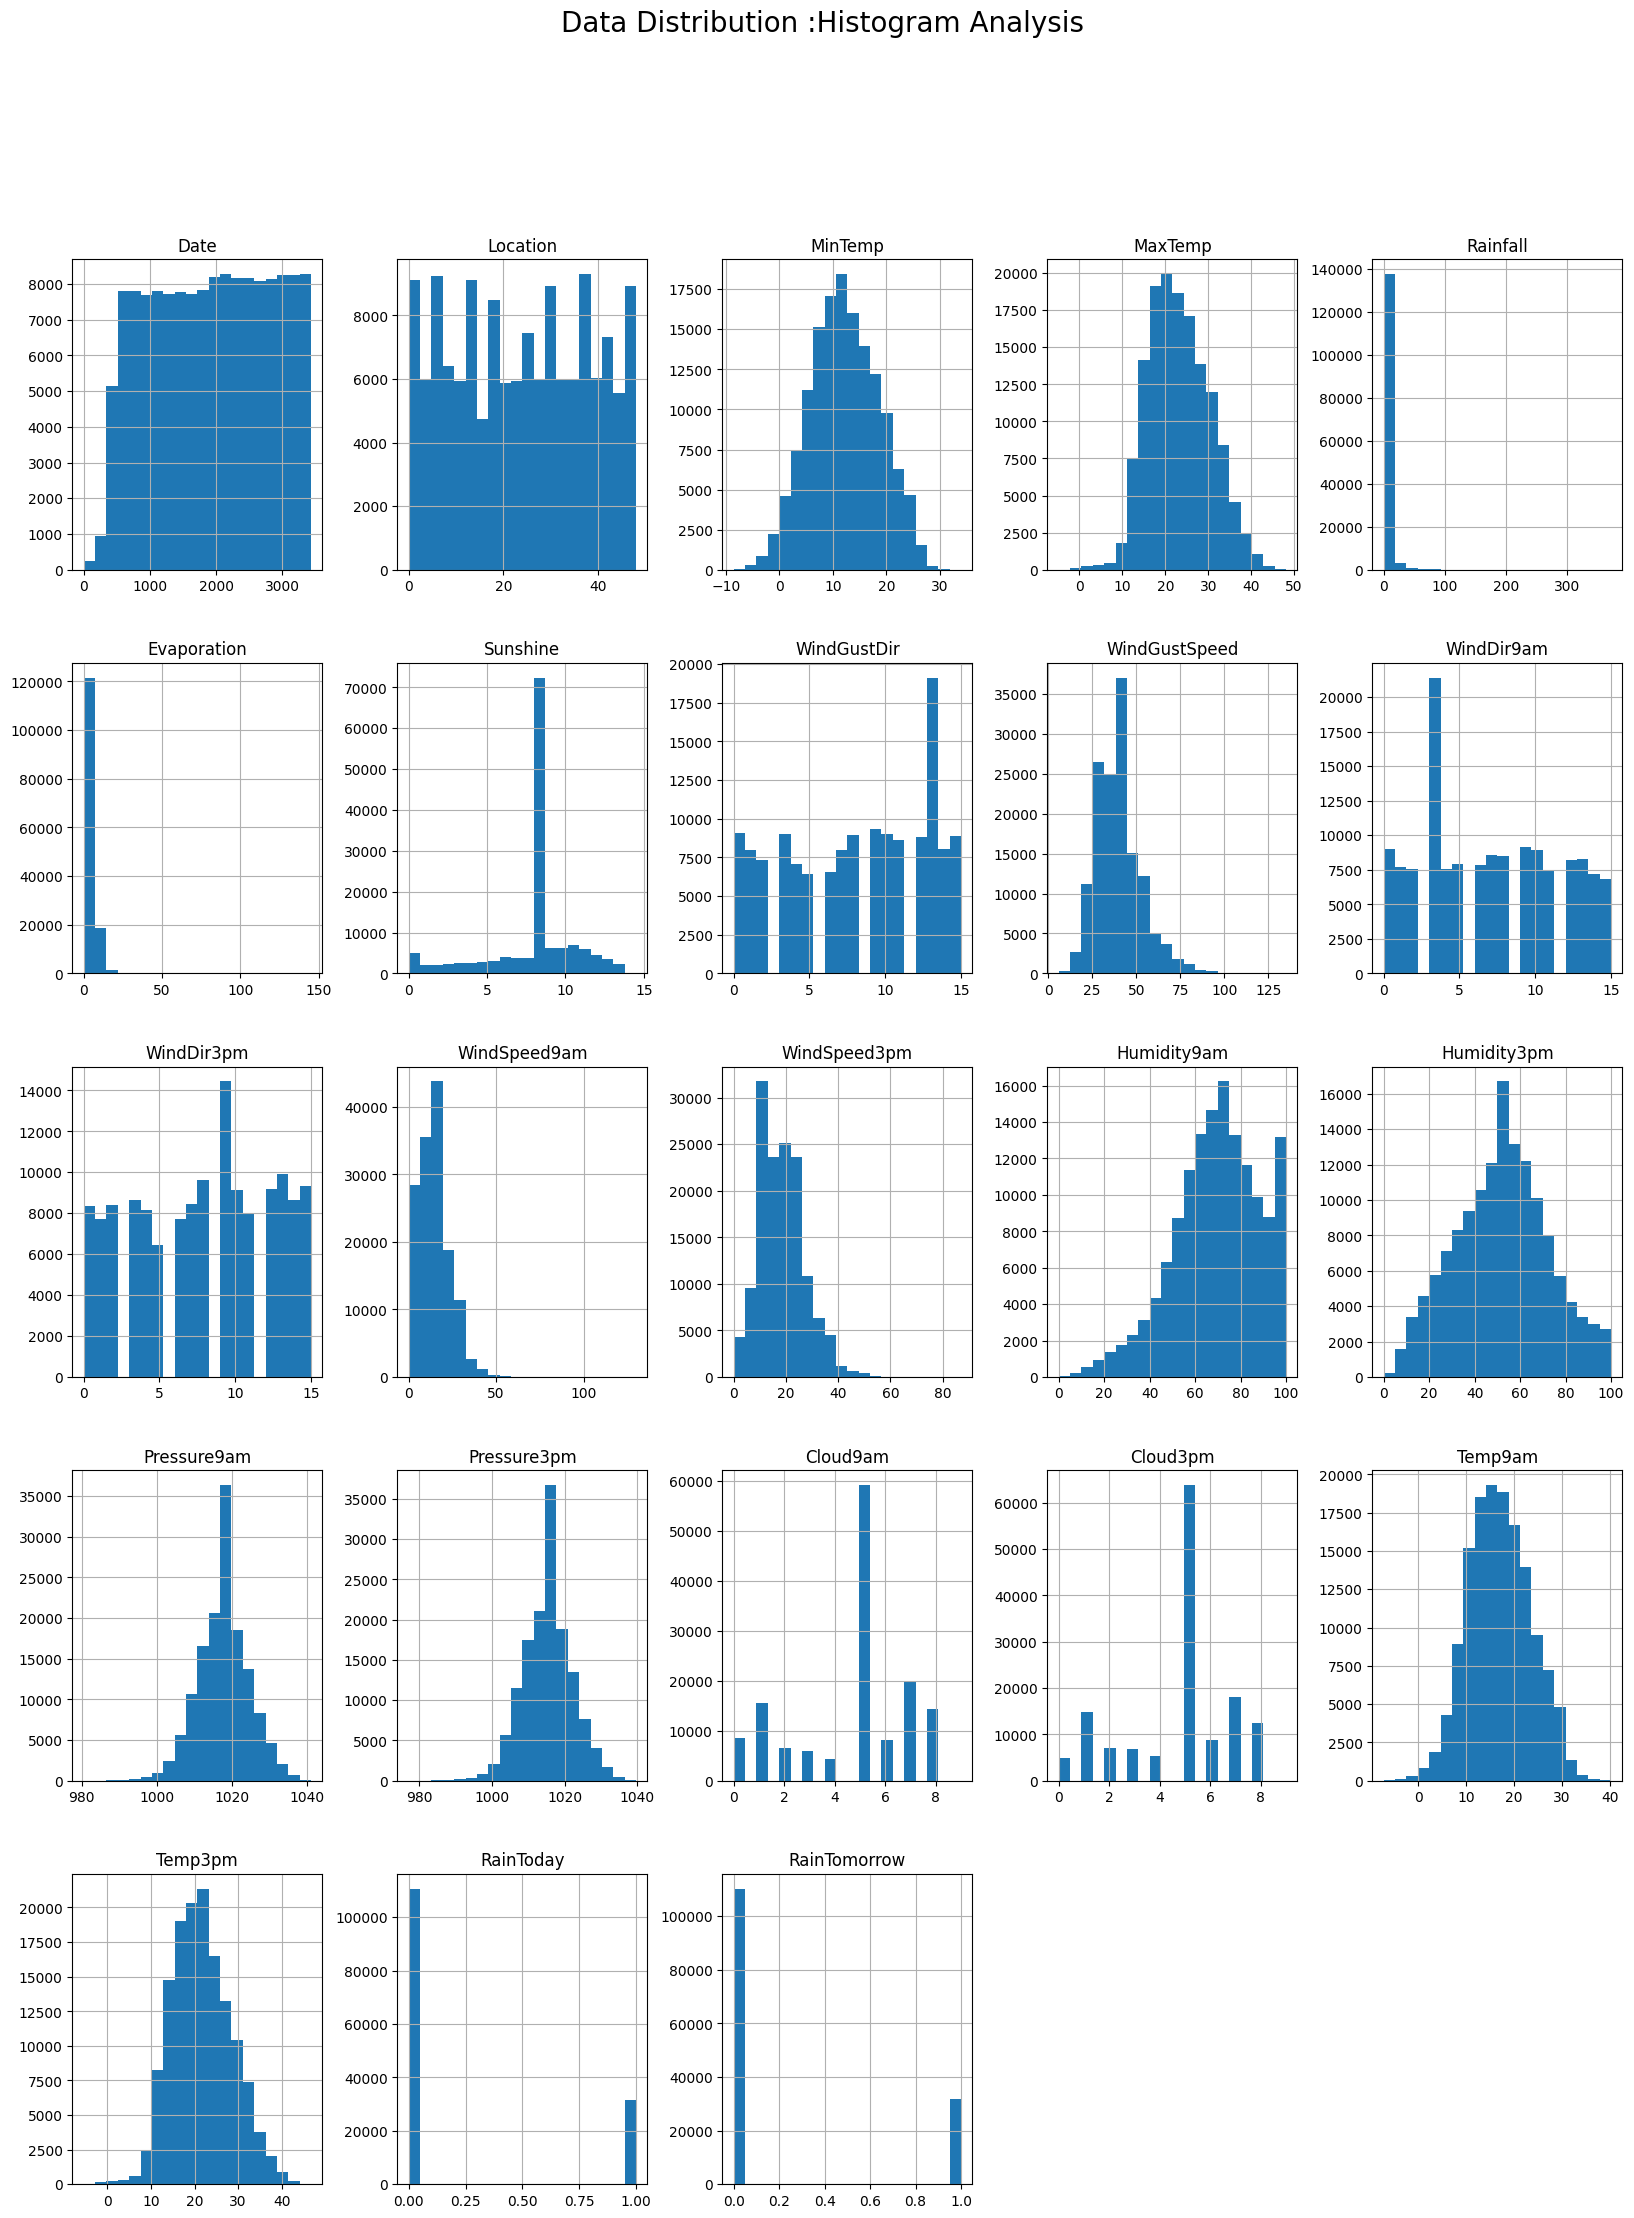

In [33]:
df.hist(bins=20, figsize=(20,25))
plt.suptitle("Data Distribution :Histogram Analysis",fontsize=20)
plt.show()

In [34]:
#calculate  skewness for each column
skewness=df.skew()

#sort the skewness values in ascending order
sort_skew=skewness.sort_values(ascending=True)

#Display the sorted skewness values 
print(sort_skew)

Sunshine        -1.068346
Cloud3pm        -0.562072
Cloud9am        -0.551152
Humidity9am     -0.488110
WindGustDir     -0.222513
WindDir3pm      -0.113384
Pressure9am     -0.098977
Pressure3pm     -0.046081
Date            -0.045103
Location         0.015691
MinTemp          0.024345
Humidity3pm      0.033042
Temp9am          0.092524
WindDir9am       0.170232
MaxTemp          0.225763
Temp3pm          0.247242
WindSpeed3pm     0.635020
WindSpeed9am     0.782261
WindGustSpeed    0.918436
RainTomorrow     1.322753
RainToday        1.343357
Evaporation      5.140075
Rainfall         9.934023
dtype: float64


In [35]:
#step1 :select numeric columns excluding "RainTomorrow"
numeric_cols=df.drop(columns=['RainTomorrow']).select_dtypes(include=['number'])

#step2 :calculate skewness for numeric columns
skewness=numeric_cols.skew()

#step3 :identify columns with high skewness 
highly_skewed_cols=skewness[abs(skewness)>1].index

# step4 :Apply log transformation using np.log1p() for columns with high skew
for col in highly_skewed_cols:
    df[col]=np.log1p(df[col])     #create a new column with log transformed values 
df.head()

C:\Users\Pc\AppData\Local\Temp\ipykernel_16756\975446811.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]=np.log1p(df[col])     #create a new column with log transformed values


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,396,2,13.4,22.9,0.470004,1.757858,2.24071,13,44.0,13,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0.0,0
1,397,2,7.4,25.1,0.000000,1.757858,2.24071,14,44.0,6,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0.0,0
2,398,2,12.9,25.7,0.000000,1.757858,2.24071,15,46.0,13,...,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0.0,0
3,399,2,9.2,28.0,0.000000,1.757858,2.24071,4,24.0,9,...,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0.0,0
4,400,2,17.5,32.3,0.693147,1.757858,2.24071,13,41.0,1,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0


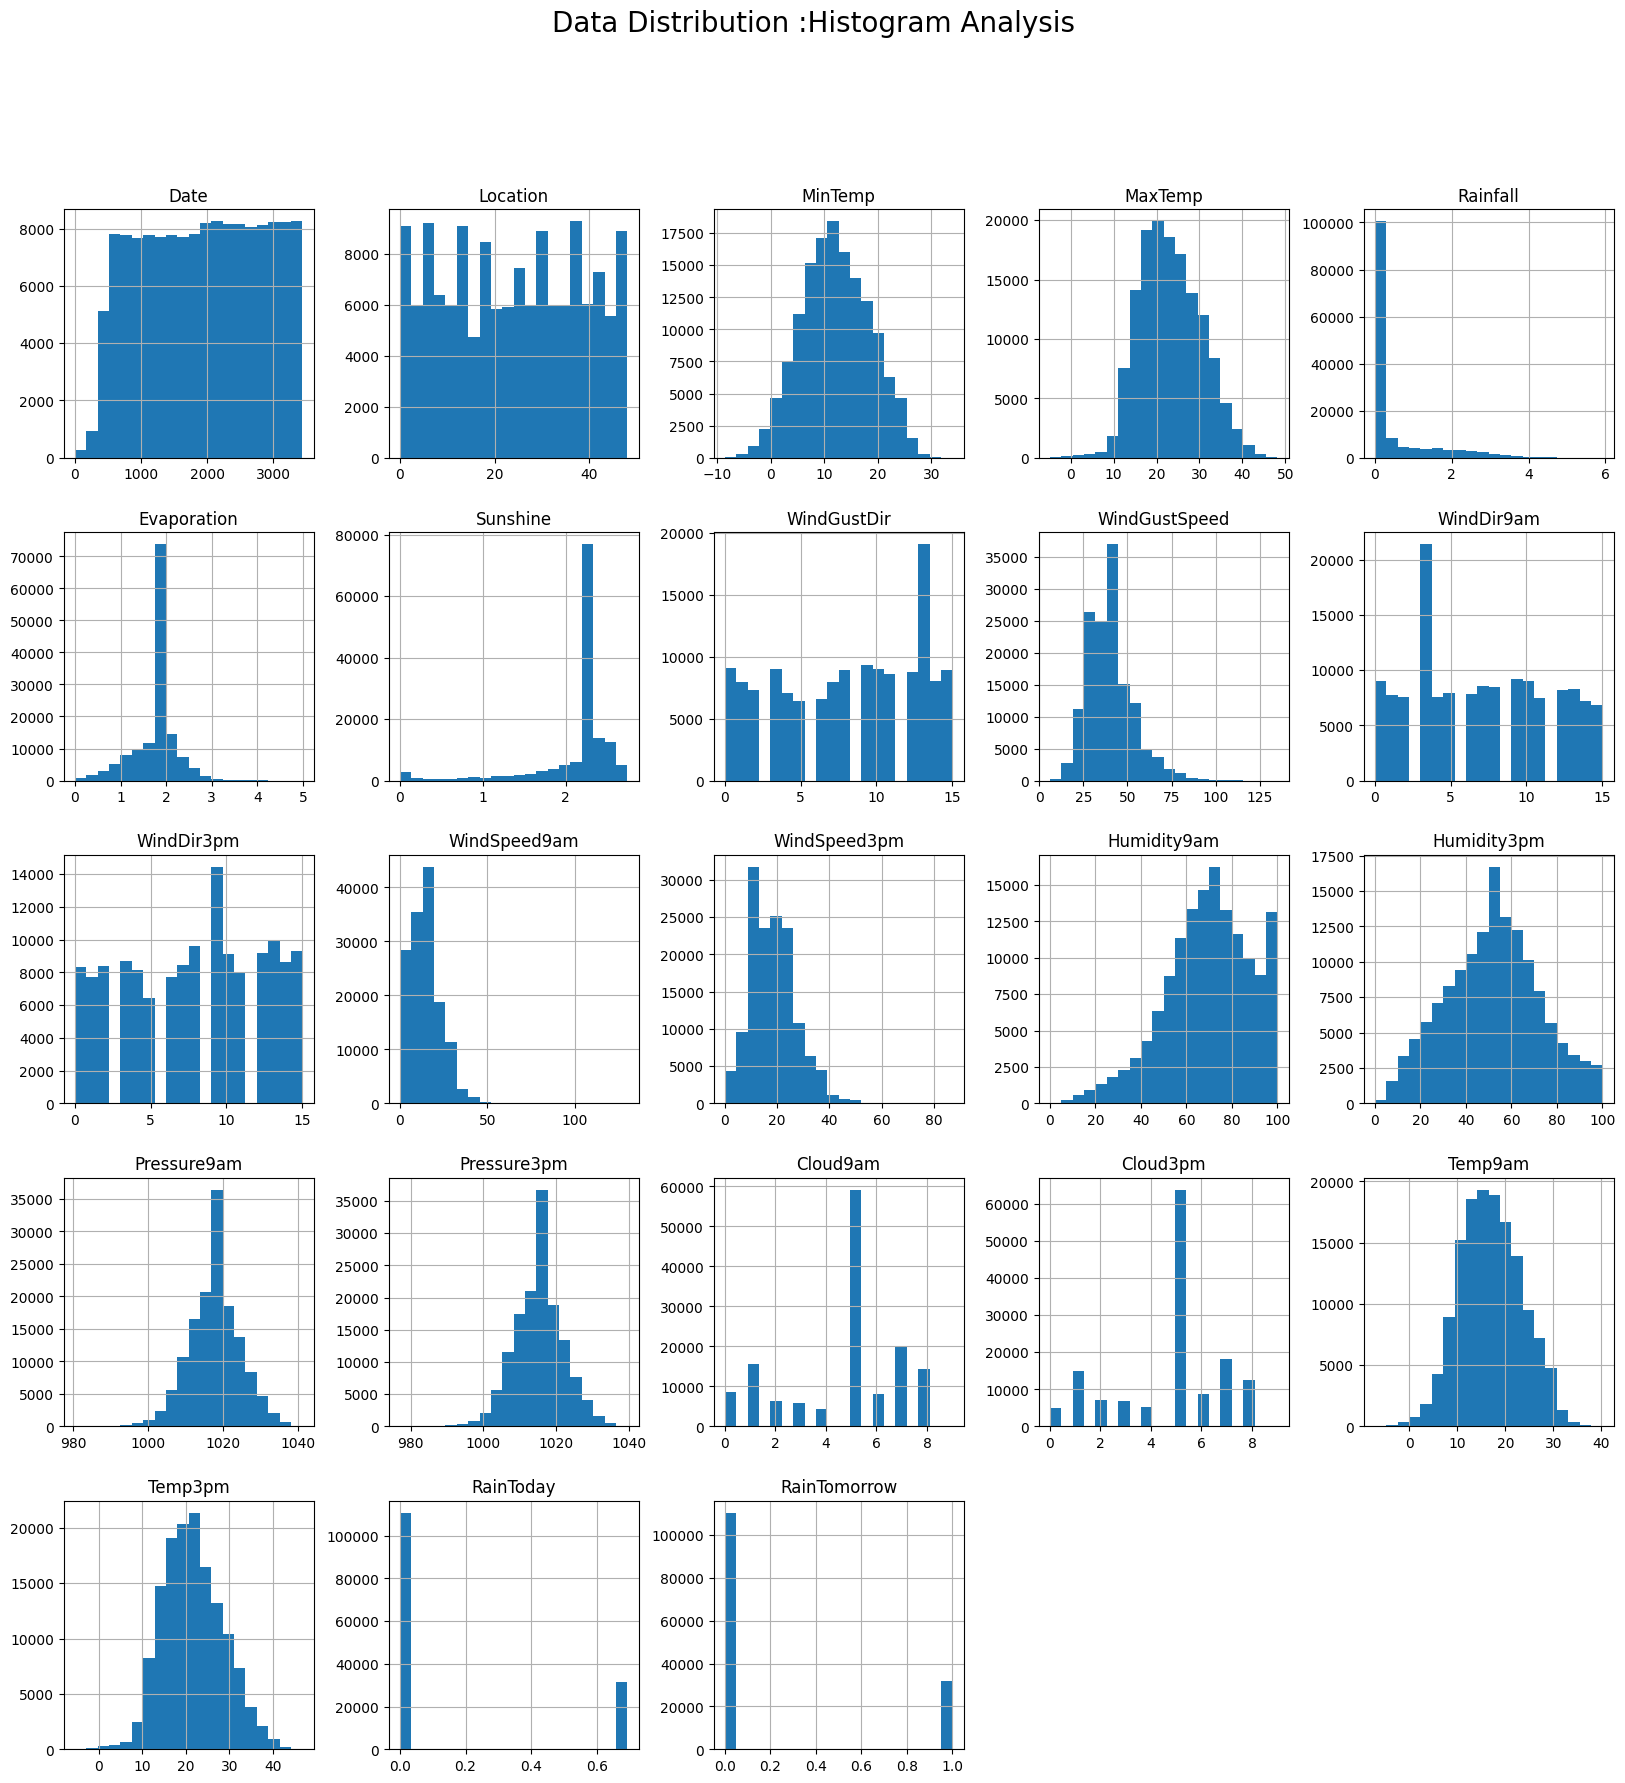

In [36]:
df.hist(bins=20, figsize=(20,20))
plt.suptitle("Data Distribution :Histogram Analysis",fontsize=20)
plt.show()

REMOVING UNWANTED FEATURES

<Axes: >

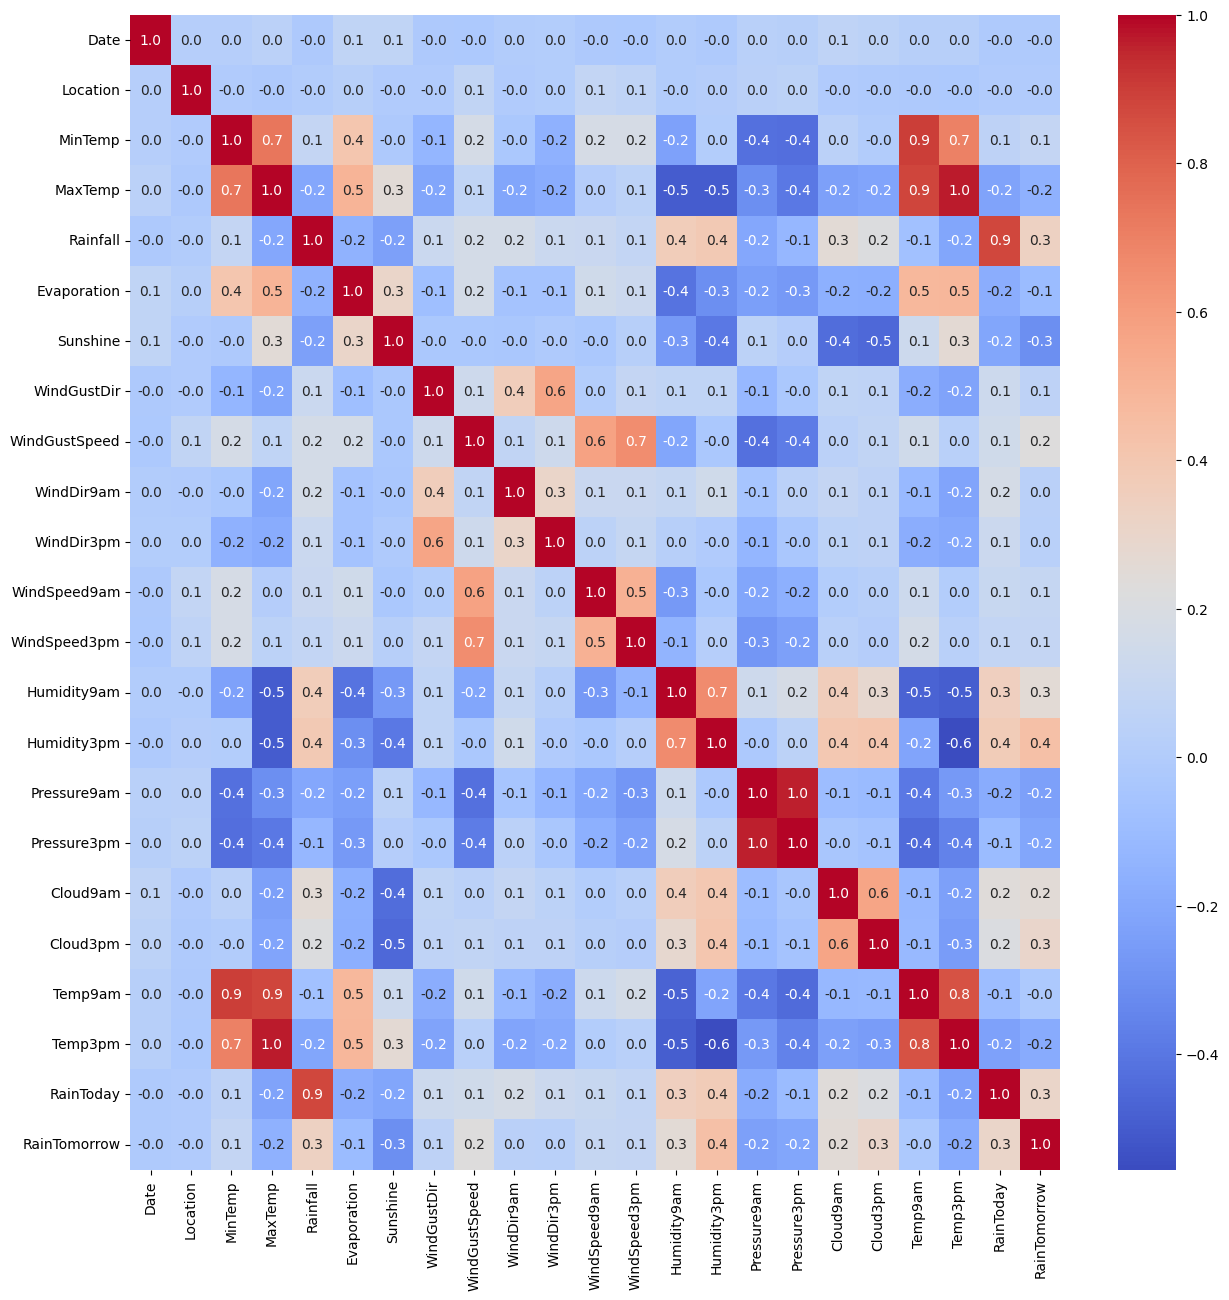

In [ ]:
#BASED ON CORRELATION

plt.figure(figsize=(15,15))
df.corr(numeric_only=True)
sns.heatmap(df.corr(numeric_only=True),annot=True, cmap='coolwarm',fmt='0.01f')

In [38]:
corr_matrix=df.corr()

#set the correlation threshold
threshold=0.5

# Find pairs of features with high correlation 
highly_correlated_pairs=[]
for i in range (len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i,j])>threshold:   #check if the absolute correlation exceeds the threshold
            highly_correlated_pairs.append((corr_matrix.columns[i],corr_matrix.columns[j]))


#Print all pairs of highly correlated features
print(highly_correlated_pairs)

[('MaxTemp', 'MinTemp'), ('WindDir3pm', 'WindGustDir'), ('WindSpeed9am', 'WindGustSpeed'), ('WindSpeed3pm', 'WindGustSpeed'), ('WindSpeed3pm', 'WindSpeed9am'), ('Humidity9am', 'MaxTemp'), ('Humidity3pm', 'Humidity9am'), ('Pressure3pm', 'Pressure9am'), ('Cloud3pm', 'Cloud9am'), ('Temp9am', 'MinTemp'), ('Temp9am', 'MaxTemp'), ('Temp3pm', 'MinTemp'), ('Temp3pm', 'MaxTemp'), ('Temp3pm', 'Humidity3pm'), ('Temp3pm', 'Temp9am'), ('RainToday', 'Rainfall')]


In [39]:
df.drop(["Temp9am","Pressure9am","MinTemp","WindSpeed9am","Humidity9am","Cloud9am"],axis=1,inplace=True)

C:\Users\Pc\AppData\Local\Temp\ipykernel_16756\2846780315.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(["Temp9am","Pressure9am","MinTemp","WindSpeed9am","Humidity9am","Cloud9am"],axis=1,inplace=True)


In [40]:
#step1: Calculate the correlation of each feature with the target
corr_with_target=df.corr()['RainTomorrow'].sort_values(ascending=False)

#step2: set the trushold for low correlation (-0.05 to 0.05)
low_corr_feature=corr_with_target[(corr_with_target>-0.05)&
                                  (corr_with_target<0.05)]

#step#: Print the list of features with low correlation
print("Features with correlation between -0.05 and 0.05:")
print(low_corr_feature)

Features with correlation between -0.05 and 0.05:
WindDir9am    0.035776
WindDir3pm    0.030488
Location     -0.003579
Date         -0.010947
Name: RainTomorrow, dtype: float64


In [41]:
df.drop(["Date","WindDir9am"],axis=1,inplace=True)

C:\Users\Pc\AppData\Local\Temp\ipykernel_16756\434903454.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(["Date","WindDir9am"],axis=1,inplace=True)


In [42]:
corr_with_target=df.corr()['RainToday'].sort_values(ascending=False)

#step2: set the trushold for low correlation (-0.05 to 0.05)
low_corr_feature=corr_with_target[(corr_with_target>-0.05)&
                                  (corr_with_target<0.05)]

#step#: Print the list of features with low correlation
print("Features with correlation between -0.05 and 0.05:")
print(low_corr_feature)

Features with correlation between -0.05 and 0.05:
Location   -0.004911
Name: RainToday, dtype: float64


In [43]:
df.shape

(142193, 15)

In [44]:
df.columns

Index(['Location', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir3pm', 'WindSpeed3pm',
       'Humidity3pm', 'Pressure3pm', 'Cloud3pm', 'Temp3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')

SCALING

In [45]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
# create a copy of the original data for comparison
df_scaled=df.copy()

#select numeric coumns excluding 'RainTomorrow'
numeric_cols=df.drop(columns=['RainTomorrow']).select_dtypes(include=['number']).columns

#initialize the standerdscaler
scaler=StandardScaler()

#apply the scaler only to the numeric columns
df_scaled[numeric_cols]=scaler.fit_transform(df[numeric_cols])
df_scaled.head()

,Location,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir3pm,WindSpeed3pm,Humidity3pm,Pressure3pm,Cloud3pm,Temp3pm,RainToday,RainTomorrow
0,-1.527004,-0.045764,-0.011616,0.07993,0.259972,1.052556,0.310479,1.366277,0.614071,-1.436563,-1.220105,0.140339,0.018050,-0.532962,0
1,-1.527004,0.263677,-0.533135,0.07993,0.259972,1.265582,0.310479,1.586236,0.384757,-1.290451,-1.115343,0.140339,0.381886,-0.532962,0
2,-1.527004,0.348070,-0.533135,0.07993,0.259972,1.478609,0.462679,1.586236,0.843386,-1.046931,-0.980648,-1.275593,0.221798,-0.532962,0
3,-1.527004,0.671577,-0.533135,0.07993,0.259972,-0.864683,-1.211523,-1.713146,-1.105785,-1.728788,-0.367040,0.140339,0.702062,-0.532962,0
4,-1.527004,1.276393,0.235986,0.07993,0.259972,1.052556,0.082179,-0.173434,0.155443,-0.900818,-1.384732,1.556271,1.167773,-0.532962,0


HANDLING OUTLIERS

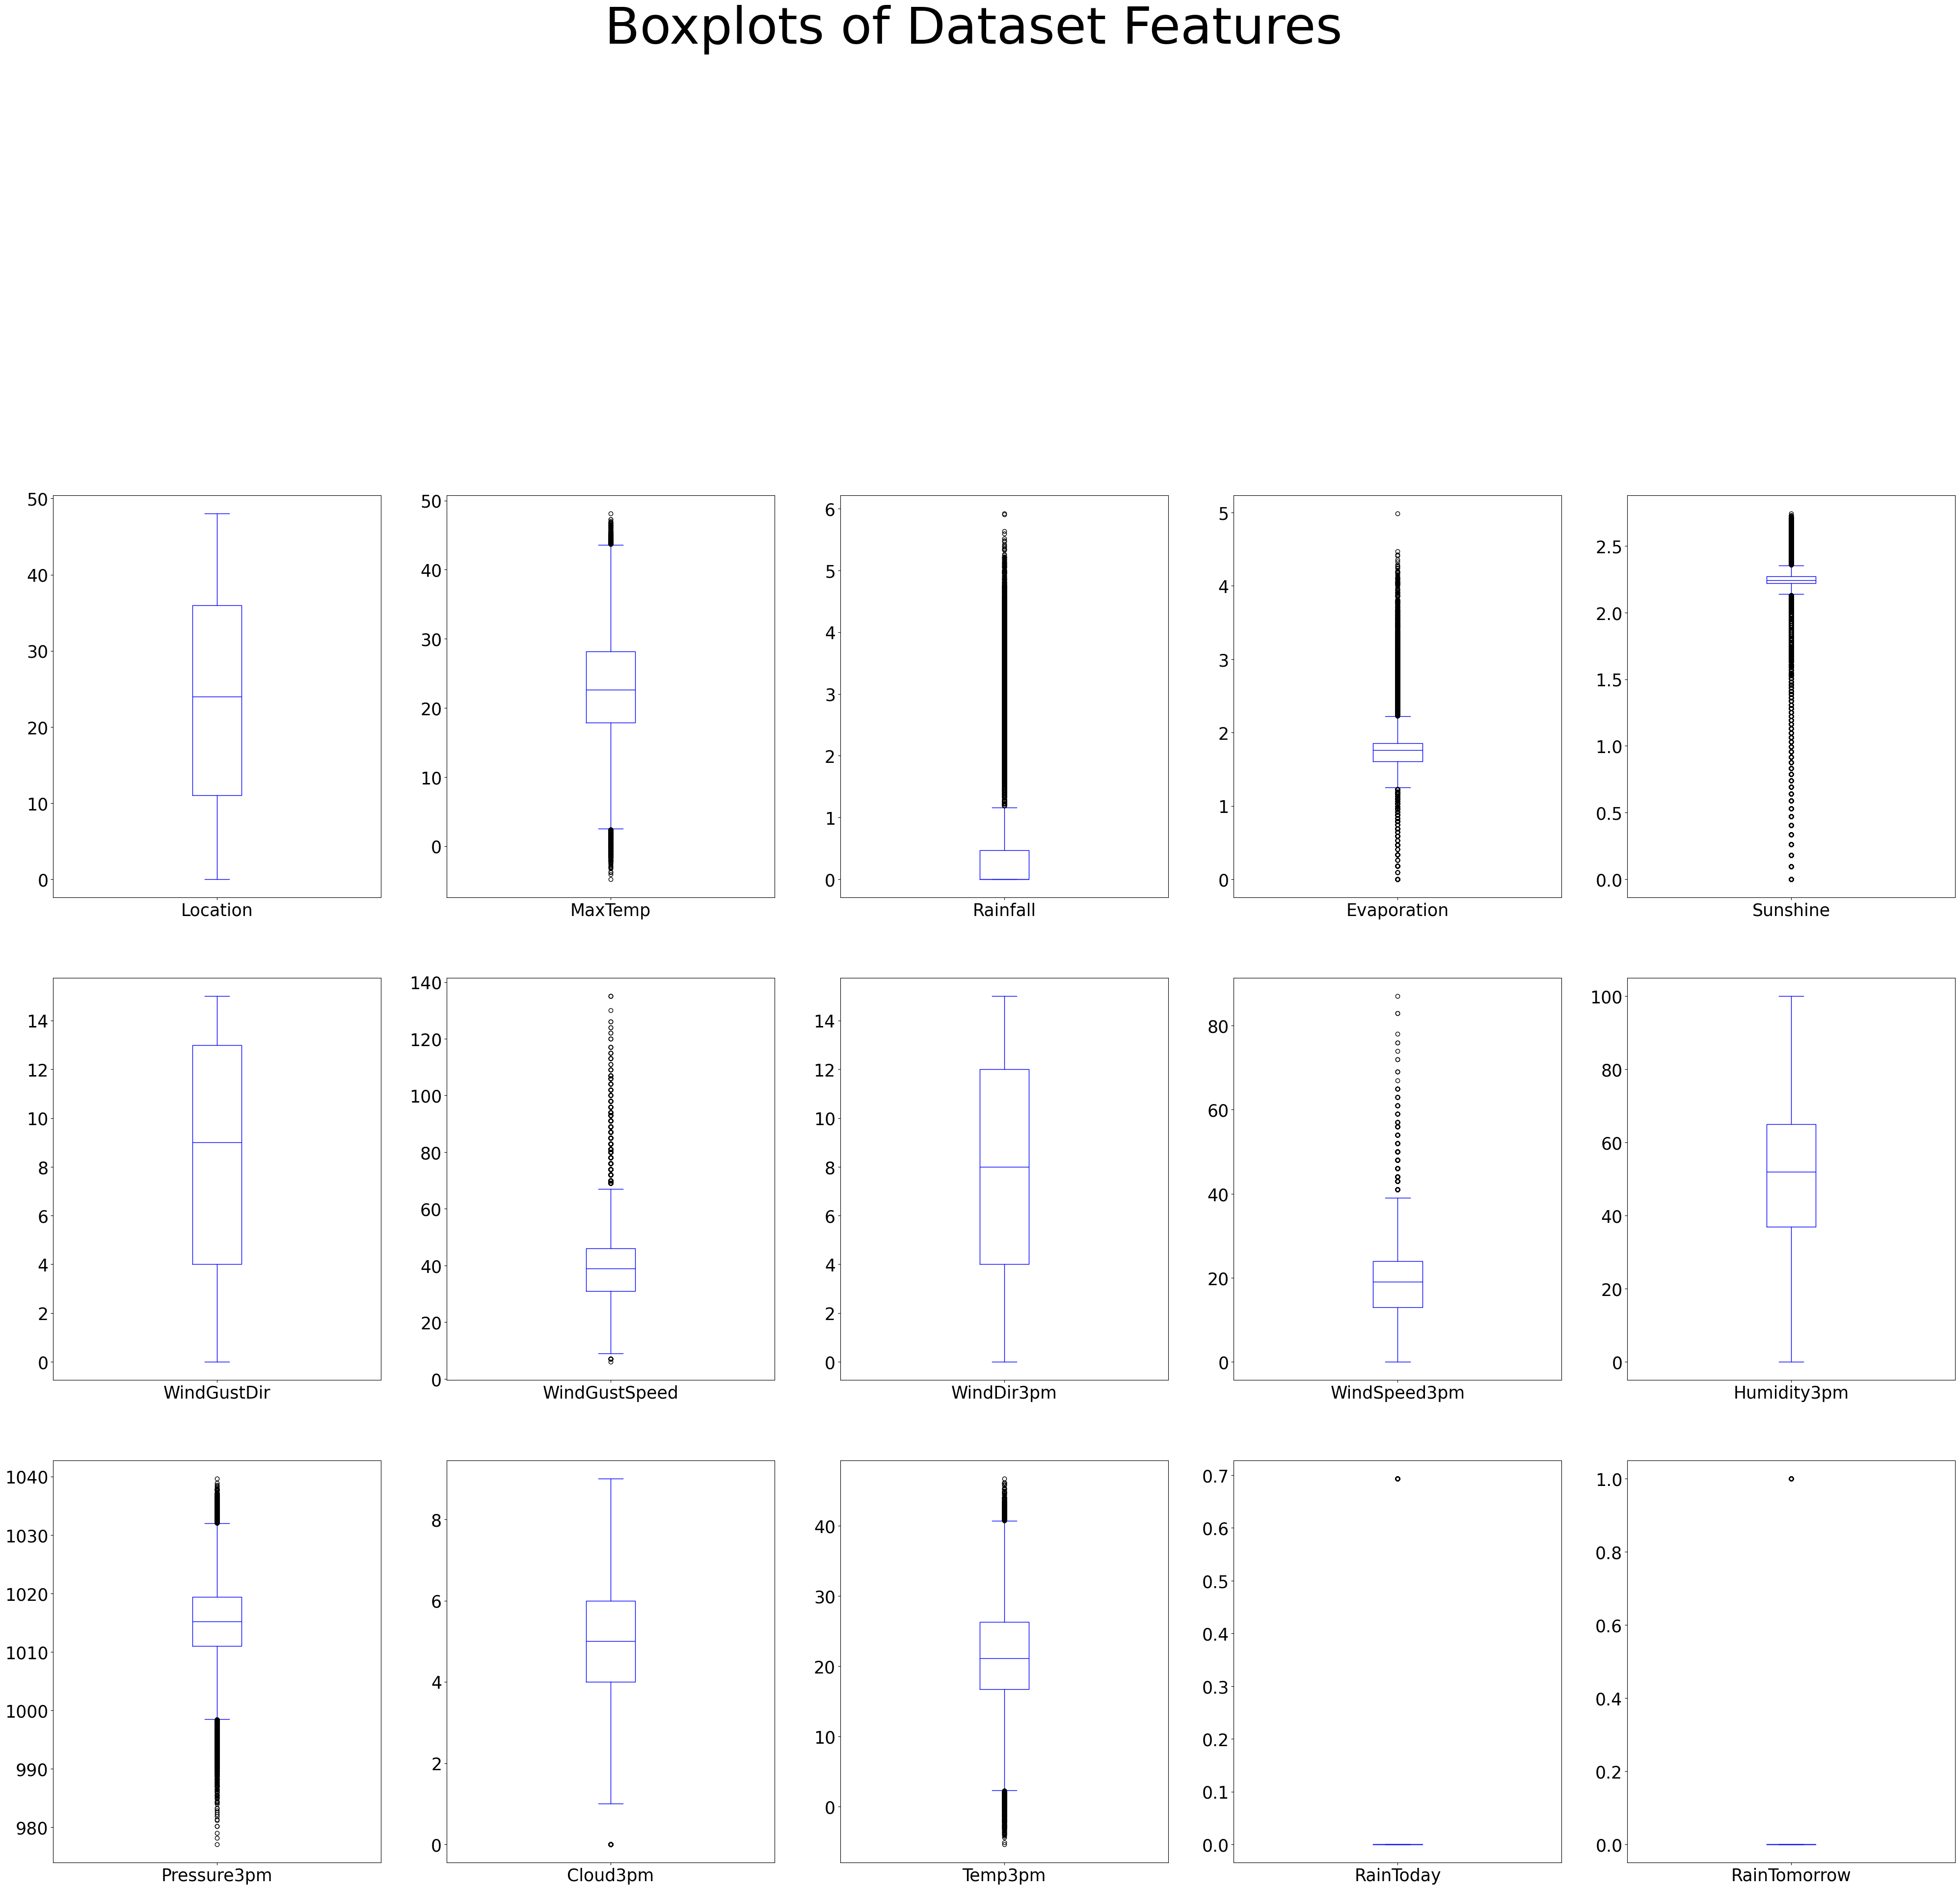

In [46]:
#USING BOXPLOT

df.plot(kind='box',subplots=True,layout=(8,5),figsize=(50,100),color='blue',fontsize=25)
plt.suptitle("Boxplots of Dataset Features",fontsize=75)
plt.show()

In [47]:
# create a copy the original data for comparison
df_copy=df.copy()

def remove_outliers_iqr(df,exclude_columns):
    #Loop thruogh numeric columns
    for column in df.select_dtypes(include=['number']):
        if column in exclude_columns:
            continue  #skip exclude columns

        Q1=df[column].quantile(0.25)
        Q3=df[column].quantile(0.75)
        IQR=Q3-Q1

        #Define outlier bonds
        lower_bond=Q1-1.5*IQR
        upper_bond=Q3+1.5*IQR

        #Filter out the outliers
        df=df[(df[column]>=lower_bond)& (df[column]<=upper_bond)]
    return df

#Define the columns to exclude 
exclude_columns=['RainTomorrow','RainToday']

#remove outliers
df=remove_outliers_iqr(df,exclude_columns)

#print shapes of data before and after removing outliers
print("shape of data before removing outliers :",df_copy.shape)
print("shape of data after removing outliers :",df.shape)
print("Number of outlier removed:",df_copy.shape[0]-df.shape[0])

shape of data before removing outliers : (142193, 15)
shape of data after removing outliers : (34840, 15)
Number of outlier removed: 107353


## CLASSIFICATION MODELING

In [48]:
x=df.drop(['RainTomorrow'],axis=1)
y=df[['RainTomorrow']]

In [49]:
df[['RainTomorrow']].value_counts()

RainTomorrow
0               29968
1                4872
Name: count, dtype: int64

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

print('shape of training feature:',x_train.shape)
print('shape of testing feature :', x_test.shape)
print('shape of training target:',y_train.shape)
print('shape of testing target:',y_test.shape)

shape of training feature: (27872, 14)
shape of testing feature : (6968, 14)
shape of training target: (27872, 1)
shape of testing target: (6968, 1)


In [51]:
model=LogisticRegression()
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

#Accuracy
arcy=accuracy_score(y_test,y_pred)
print("Accuracy:",arcy)

#confusion matrics
print("\nconfusion matrics:\n",confusion_matrix(y_test,y_pred))

#Detailed classification report
print("\nClassification report:\n",classification_report(y_test,y_pred))

Accuracy: 0.8768656716417911

confusion matrics:
 [[5910   84]
 [ 774  200]]

Classification report:
               precision    recall  f1-score   support

           0       0.88      0.99      0.93      5994
           1       0.70      0.21      0.32       974

    accuracy                           0.88      6968
   macro avg       0.79      0.60      0.63      6968
weighted avg       0.86      0.88      0.85      6968



c:\Users\Pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [52]:
clas_models={'lr':LogisticRegression(max_iter=500),
             'rfc':RandomForestClassifier(),
             'dtc':DecisionTreeClassifier(),
             'knn':KNeighborsClassifier(n_neighbors=11),
             'svm':SVC(kernel='linear'),
             'gbc':GradientBoostingClassifier(random_state=0,learning_rate=0.45),
             'etc':ExtraTreesClassifier(),
             'nb':GaussianNB()}

In [53]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

#Dictionary to store result
results={'Model':[],'Accuracy':[],'Precision':[],'Recall':[],'F1-Score':[]}

#Evaluate each model 
for model_name ,model in clas_models.items():
    #train the model 
    model.fit(x_train,y_train)
    model_pred=model.predict(x_test)

    #calculate metrics
    accuracy=accuracy_score(y_test,model_pred)
    precision=precision_score(y_test,model_pred)
    recall=recall_score(y_test,model_pred)
    f1=f1_score(y_test,model_pred)

    #store results in the dictionary 
    results['Model'].append(model)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1-Score'].append(f1)

#convert results to a Dataframe 
results_df=pd.DataFrame(results)

#Display the results in a table
results_df

c:\Users\Pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was ex

,Model,Accuracy,Precision,Recall,F1-Score
0,LogisticRegression(max_iter=500),0.876866,0.685897,0.219713,0.332815
1,"(DecisionTreeClassifier(max_features='sqrt', r...",0.881602,0.687657,0.280287,0.398249
2,DecisionTreeClassifier(),0.819604,0.367880,0.404517,0.385330
3,KNeighborsClassifier(n_neighbors=11),0.880023,0.680628,0.266940,0.383481
4,SVC(kernel='linear'),0.877009,0.671554,0.235113,0.348289
5,([DecisionTreeRegressor(criterion='friedman_ms...,0.884185,0.675789,0.329569,0.443064
6,"(ExtraTreeClassifier(random_state=1887243347),...",0.879449,0.703030,0.238193,0.355828
7,GaussianNB(),0.849311,0.435374,0.262834,0.327785


In [54]:
x2s=df_scaled.drop('RainTomorrow',axis=1)
y2s=df_scaled[['RainTomorrow']]

x2s_train,x2s_test,y2s_train,y2s_test=train_test_split(x2s,y2s,random_state=42,test_size=0.2)

#Dictionary to store result
results={'Model':[],'Accuracy':[],'Precision':[],'Recall':[],'F1-Score':[]}

#Evaluate each model 
for model_name ,model in clas_models.items():
    #train the model 
    model.fit(x2s_train,y2s_train)
    model_pred2s=model.predict(x2s_test)

    #calculate metrics
    accuracy2=accuracy_score(y2s_test,model_pred2s)
    precision2=precision_score(y2s_test,model_pred2s)
    recall2=recall_score(y2s_test,model_pred2s)
    f12=f1_score(y2s_test,model_pred2s)

    #store results in the dictionary 
    results['Model'].append(model)
    results['Accuracy'].append(accuracy2)
    results['Precision'].append(precision2)
    results['Recall'].append(recall2)
    results['F1-Score'].append(f12)

#convert results to a Dataframe 
results_df2=pd.DataFrame(results)

#sort by accuracy
results_df2=results_df2.sort_values(by='Accuracy',ascending=False)

#display 
results_df2

c:\Users\Pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWa

,Model,Accuracy,Precision,Recall,F1-Score
1,"(DecisionTreeClassifier(max_features='sqrt', r...",0.852456,0.746495,0.512222,0.607557
6,"(ExtraTreeClassifier(random_state=336169241), ...",0.851788,0.752614,0.499448,0.600436
5,([DecisionTreeRegressor(criterion='friedman_ms...,0.850592,0.730498,0.522788,0.609431
3,KNeighborsClassifier(n_neighbors=11),0.842997,0.719981,0.484151,0.578972
0,LogisticRegression(max_iter=500),0.839094,0.702362,0.483047,0.572416
4,SVC(kernel='linear'),0.837969,0.716139,0.452768,0.554783
7,GaussianNB(),0.785998,0.517865,0.582873,0.548449
2,DecisionTreeClassifier(),0.783150,0.513166,0.534774,0.523747


**`FINAL REPORT`**

Based On The Evaluation Of The Classification Models For Predicting `"RainTomorrow"` , The `DecisionTreeClassifier` is the best performing model with accuracy :0.85

## FILE SAVING

In [ ]:
import pickle 

#save the classification model
c_model=GradientBoostingClassifier(random_state=0,learning_rate=0.45)
c_model.fit(x2s_train,y2s_train.values.ravel())
with open ("classification_model.pkl",'wb') as file:
     pickle.dump(c_model,file)